In [8]:
pip install opencv-python


     -------------------------------------- 38.1/38.1 MB 208.1 kB/s eta 0:00:00


In [4]:
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [5]:
# zero and ninty degree I0 intesnity image path
zero_deg_image_folder = 'file path' # include the file path
zero_deg_image_name = '/zero_deg.jpg'
ninty_deg_image_folder = 'file path'  # include the file path
ninty_deg_image_name = '/ninty_deg.jpg'

In [6]:
#Load the grayscale image
zero_image= Image.open(zero_deg_image_folder+zero_deg_image_name).convert("L")
ninty_image= Image.open(ninty_deg_image_folder+ninty_deg_image_name).convert("L")

In [7]:
#get the iamge dimension
zero_width, zero_height = zero_image.size
zero_num_pixels = zero_width*zero_height
ninty_width, ninty_height = ninty_image.size
ninty_num_pixels = ninty_width*ninty_height

In [8]:
#calculate the summation of intensity values
zero_sum_intensity = 0
max_intense =[]
for y in range(zero_height):
    for x in range(zero_width):
        
        intensity = zero_image.getpixel((x,y))
        max_intense.append(intensity)
        zero_sum_intensity += intensity 
#average_zero_intensity = zero_sum_intensity/zero_num_pixels        
#print("number of pixels: ", num_pixels)
print("summation of average intenstiy values for zero degree: ",  zero_sum_intensity)    

ninty_sum_intensity = 0
for y in range(ninty_height):
    for x in range(ninty_width):
        intensity = ninty_image.getpixel((x,y))
        ninty_sum_intensity += intensity 
#average_ninty_intensity = ninty_sum_intensity/ninty_num_pixels        
#print("number of pixels: ", num_pixels)
print("summation of intenstiy values for ninty degree: ",  ninty_sum_intensity)    

summation of average intenstiy values for zero degree:  7793730
summation of intenstiy values for ninty degree:  6535435


In [9]:
# loading zero_deg image file
images_folder = 'type the image name with file path'
image_files = os.listdir(images_folder)
zero_deg = []

for image_file in image_files:
    pixel_value = 0
    print(image_file)
    image_path = os.path.join(images_folder, image_file)
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    for row in range(gray_image.shape[0]):
        for col in range(gray_image.shape[1]):
            pixel_value += gray_image[row, col]
            reflectance = pixel_value/zero_sum_intensity
    zero_deg.append(reflectance)        
#cv2.imshow('Current Image', gray_image)
#cv2.waitKey(0)            
print(zero_deg)            

50_0.jpg
52_0.jpg
54_0.jpg
56_0.jpg
58_0.jpg
60_0.jpg
62_0.jpg
64_0.jpg
66_0.jpg
69_0.jpg
70_0.jpg
74_0.jpg
76_0.jpg
78_0.jpg
80_0.jpg
84_0.jpg
86_0.jpg
88_0.jpg
90_0.jpg
[0.5438898961087951, 0.3142864841353242, 0.514084783537536, 0.39157669049351207, 0.5016860989539027, 0.46279522128685496, 0.11507288551181527, 0.2802699092732235, 0.38995487398203427, 0.11022308958611601, 0.40714510253755265, 0.3141506056791806, 0.42703455213357405, 0.39751133282779877, 0.398882948216066, 0.36843783400246094, 0.34826174373502805, 0.3372650835992522, 0.32662062965999594]


In [10]:
# loading ninty_deg image file
images_folder1 = 'type the file path with file name'
image_files1 = os.listdir(images_folder1)
ninty_deg = []

for image_file in image_files1:
    pixel_value1 = 0
    print(image_file)
    image_path1 = os.path.join(images_folder1, image_file)
    gray_image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
   
    for row in range(gray_image1.shape[0]):
        for col in range(gray_image1.shape[1]):
            pixel_value1 += gray_image1[row, col]
            reflectance1 = pixel_value1/ninty_sum_intensity
    ninty_deg.append(reflectance1)        
#cv2.imshow('Current Image', gray_image)
#cv2.waitKey(0)            
print(ninty_deg)  

50_90.jpg
52_90.jpg
54_90.jpg
56_90.jpg
58_90.jpg
60_90.jpg
62_90.jpg
64_90.jpg
66_90.jpg
69_90.jpg
70_90.jpg
74_90.jpg
76_90.jpg
78_90.jpg
80_90.jpg
84_90.jpg
86_90.jpg
88_90.jpg
90_90.jpg
[0.30016823669732773, 0.1617823450160548, 0.27820642390292305, 0.18406395289678498, 0.21502945098528253, 0.18775521445779814, 0.1148312239353616, 0.21118548344524887, 0.2121038614874144, 0.11505217326773198, 0.2542268418246069, 0.19369712957132923, 0.30568034109435716, 0.27056225025572134, 0.2930170677238776, 0.27789932881284873, 0.2586704634045018, 0.267336298195912, 0.2649350808324159]


[80.  79.  78.  77.  76.  75.  74.  73.  72.  70.5 70.  68.  67.  66.
 65.  63.  62.  61.  60. ]


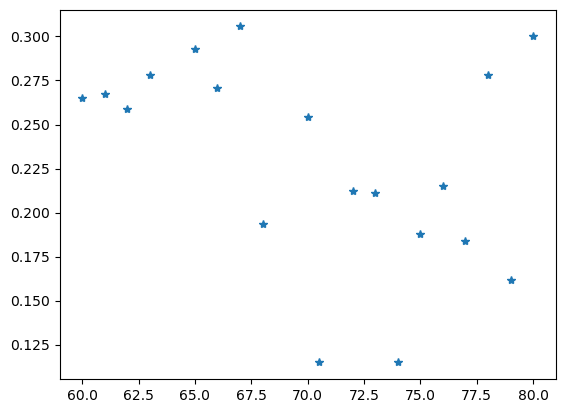

In [11]:
 x=[50 ,65+3/60,70+8/60,72+5/60,74,76+8/60,78,80+5/60,82+4/60,84+5/60,86+5/60,88,90,92+2/60,94+9/60,96+6/60,98+4/60,100+3/60,102+9/60,104+11/60,106+8/60,108+6/60,110+2/60,115+5/60,120+10/60,130+10/60] # this array use for glass 
#x=[50,52+7/60,54,56+7/60,58+1/60,60+5/60,62,64+6/60,66+5/60,69,70,74,76+10/60,78,80+6/60,84+9/60,86+4/60,88+9/60,90+5/60] # this array use for gold-glass interface
x=np.array(x)
y=(210-x)/2
print(y)
#plt.subplot(2,1,1)
#plt.plot(y,zero_deg,'o')
#plt.subplot(2,1,2)
plt.plot(y,ninty_deg,'*')

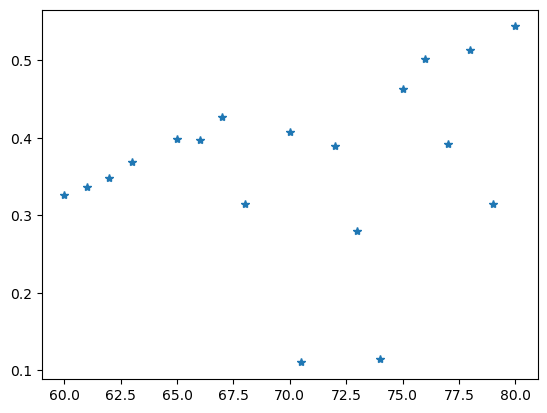

In [12]:
plt.plot(y,zero_deg,'*')

In [ ]:
# below code written for noise reduction

In [13]:
# loading ninty_deg image file
images_folder1 = 'type the file path with file name'
image_files1 = os.listdir(images_folder1)
ninty_deg = []

for image_file in image_files1:
    pixel_value1 = 0
    image_path1 = os.path.join(images_folder1, image_file)
    noisy_image = cv2.imread( image_path1, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if noisy_image is None:
        print("Error: Unable to load the image.")
    else:
        # Apply the Median Filter
        denoised_image = cv2.medianBlur(noisy_image, ksize=5)
    for row in range(denoised_image.shape[0]):
        for col in range(denoised_image.shape[1]):
            pixel_value1 += denoised_image[row, col]
            reflectance1 = pixel_value1/ninty_sum_intensity        
    ninty_deg.append(reflectance1)  
print(ninty_deg)      

[0.30082527023832384, 0.16210214010238033, 0.2790663513599324, 0.18434993233044167, 0.21525208344968622, 0.1879910059544621, 0.11494644197364062, 0.2115530182765187, 0.21240299995333134, 0.11529898162861385, 0.25458137063561953, 0.19393842950010212, 0.3060500180936694, 0.2708852585941104, 0.29334742063841196, 0.2781813299344267, 0.2589315018816651, 0.2676160041374446, 0.2652678819389987]


In [14]:
# loading zero_deg image file
images_folder1 = 'type the file path with file name''
image_files = os.listdir(images_folder)
zero_deg = []
intense = []
error =[]
for image_file in image_files:
    pixel_value = 0
    image_path = os.path.join(images_folder, image_file)
    noisy_image = cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if noisy_image is None:
        print("Error: Unable to load the image.")
    else:
        # Apply the Median Filter
        denoised_image = cv2.medianBlur(noisy_image, ksize=5)
    for row in range(denoised_image.shape[0]):
        for col in range(denoised_image.shape[1]):
            intense.append(denoised_image[row, col])
            pixel_value += denoised_image[row, col]
            reflectance = pixel_value/ zero_sum_intensity 
              
    error_zero = reflectance*(np.sqrt((np.std(intense)/pixel_value)**2 +(np.std(max_intense)/zero_sum_intensity)**2))   
    error.append(error_zero)
    zero_deg.append(reflectance)  
print(zero_deg)  

[0.5456037096486535, 0.31467641296272775, 0.515440360392264, 0.39212097416769637, 0.5020090508652468, 0.4637561219082519, 0.11519490667498104, 0.2805979935153001, 0.3903720041623202, 0.11045763710059239, 0.4075523529811785, 0.3140715677858997, 0.42789498738088183, 0.3980608771409838, 0.39921988572865624, 0.368807490123471, 0.34860047756337464, 0.3375020689708266, 0.32701902683310813]


[80.         78.94166667 78.         76.94166667 75.99166667 74.95833333
 74.         72.95       71.95833333 70.5        70.         68.
 66.91666667 66.         64.95       62.925      61.96666667 60.925
 59.95833333]
[2.7558390738263303e-06, 3.6064752570867273e-06, 3.4688403345377597e-06, 3.236258082306796e-06, 3.2070059139067184e-06, 3.104569414056139e-06, 4.019987813543303e-06, 3.9929960103876364e-06, 3.892258170823095e-06, 4.165000191538913e-06, 4.1427240962888555e-06, 3.968616397658679e-06, 3.955189166266566e-06, 3.834997948595729e-06, 3.7452400679118372e-06, 3.634918762660388e-06, 3.5415864566799173e-06, 3.456785759397344e-06, 3.4155901772009745e-06]


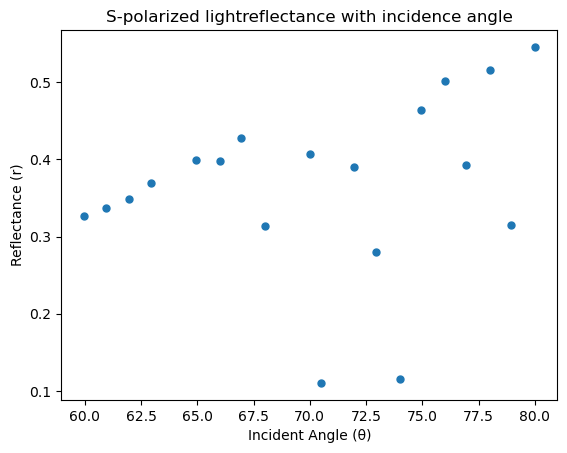

In [15]:
x=[50 ,65+3/60,70+8/60,72+5/60,74,76+8/60,78,80+5/60,82+4/60,84+5/60,86+5/60,88,90,92+2/60,94+9/60,96+6/60,98+4/60,100+3/60,102+9/60,104+11/60,106+8/60,108+6/60,110+2/60,115+5/60,120+10/60,130+10/60] # this array use for  glass  
#x=[50,52+7/60,54,56+7/60,58+1/60,60+5/60,62,64+6/60,66+5/60,69,70,74,76+10/60,78,80+6/60,84+9/60,86+4/60,88+9/60,90+5/60]# this array use for gold-glass interface
x=np.array(x)
y=(210-x)/2
print(y)

z1=np.std(zero_deg)
n1=np.std(ninty_deg)
z2=np.std(zero_sum_intensity)
n2=np.std(ninty_sum_intensity)
 
print(error )
plt.errorbar(y,zero_deg,yerr=error ,fmt='o',markersize=5)
plt.xlabel('Incident Angle (θ)')
plt.ylabel('Reflectance (r)')
plt.title('S-polarized lightreflectance with incidence angle')
dpi = 1000
plt.savefig(images_folder1+'glass_S-polarized.png', dpi=dpi, bbox_inches='tight')
#plt.errorbar(y,ninty_deg,yerr=np.sqrt (z1**2 ),fmt='o')

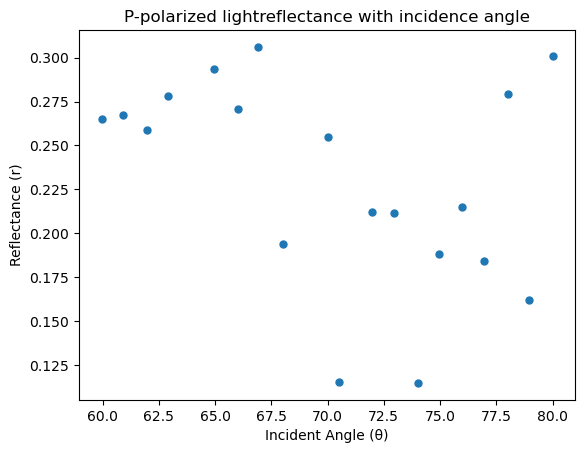

In [16]:
plt.errorbar(y,ninty_deg,yerr=error ,fmt='o',markersize=5)
plt.xlabel('Incident Angle (θ)')
plt.ylabel('Reflectance (r)')
plt.title('P-polarized lightreflectance with incidence angle')
dpi = 1000
plt.savefig(images_folder1+'glass_P-polarized.png', dpi=dpi, bbox_inches='tight')

In [ ]:
#fitting the graph

In [18]:
#y_aprox = ((A*np.cos(x)-np.sqrt((1-(np.sin(x)/A)**2)))/(A*np.cos(x)+np.sqrt((1-(np.sin(x)/A)**2))))**2
def P_trig_func(x, A):
    return ( A*np.cos(x)- np.sqrt (A-(np.sin(x))**2))/(A*np.cos(x)+np.sqrt( A-(np.sin(x))**2))
x_data = np.deg2rad(y)
y_data = ninty_deg

params, _ = curve_fit(P_trig_func, x_data, y_data)
A_fit = params
y_fit = P_trig_func(x_data, A_fit)
x_data = np.rad2deg(x_data)

def S_trig_func(x, A1):
    return  (np.cos(x)- np.sqrt(A1-(np.sin(x))**2))/ (np.cos(x)+np.sqrt(A1-(np.sin(x))**2)) 
x_data = np.deg2rad(y)
y_data1 = zero_deg

params1, _ = curve_fit(S_trig_func, x_data, y_data1)
A_fit1 = params1
y_fit1 = S_trig_func(x_data, A_fit1)
x_data = np.rad2deg(x_data)

print(params)
print((np.sum(abs(y_data-y_fit)))/(len(y_data))) 
print(params1)
print((np.sum(abs(y_data1-y_fit1)))/(len(y_data)))


[0.97505436]
0.15920837553864323
[0.9709498]
0.24792059537201203


C:\Users\Murshid\AppData\Local\Temp\ipykernel_6748\269955494.py:3: RuntimeWarning: invalid value encountered in sqrt
  return ( A*np.cos(x)- np.sqrt (A-(np.sin(x))**2))/(A*np.cos(x)+np.sqrt( A-(np.sin(x))**2))
C:\Users\Murshid\AppData\Local\Temp\ipykernel_6748\269955494.py:13: RuntimeWarning: invalid value encountered in sqrt
  return  (np.cos(x)- np.sqrt(A1-(np.sin(x))**2))/ (np.cos(x)+np.sqrt(A1-(np.sin(x))**2))


The minimum value coordinate is: (59.958333333333336, 0.013578220939442708)


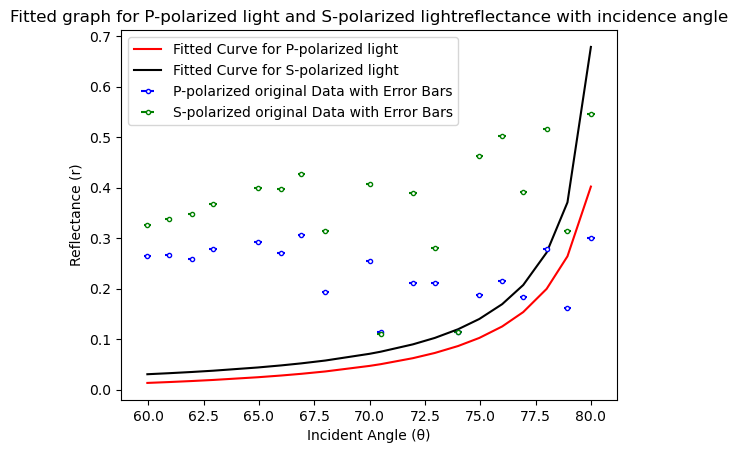

In [19]:
plt.errorbar(x_data, y_data, xerr=1/6, fmt='bo',markersize=3, markerfacecolor='white',label='P-polarized original Data with Error Bars')
plt.plot(x_data, y_fit, 'r', label='Fitted Curve for P-polarized light')

plt.errorbar(x_data, y_data1, xerr=1/6, fmt='go',markersize=3, markerfacecolor='white',label='S-polarized original Data with Error Bars')
plt.plot(x_data, y_fit1, 'black', label='Fitted Curve for S-polarized light')

plt.xlabel('Incident Angle (θ)')
plt.ylabel('Reflectance (r)')
plt.title('Fitted graph for P-polarized light and S-polarized lightreflectance with incidence angle')
plt.legend()

min_index = np.argmin(y_fit)

# Find the corresponding x_fit value at the minimum point
x_min = x_data[min_index]

# Find the minimum y_fit value (corresponding to the minimum point)
y_min = y_fit[min_index]
#y_fitted_value = y_fit(40, 1.57994363)

print(f"The minimum value coordinate is: ({x_min}, {y_min})")

#plt.axhline(y=y_min , color='magenta', linestyle='-', linewidth=0.5)

# Set the DPI (dots per inch) for high resolution
dpi = 1000  # Adjust this value for desired resolution

# Save the plot with high resolution
plt.savefig(images_folder1+'glass_p-polarized.png', dpi=dpi, bbox_inches='tight')